In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import utilities as ut
import plant_pol_inference as pp
import pandas as pd

In [52]:
M_csv = pd.read_csv('pp_matrix_01.20.20.csv')
M_csv = M_csv.fillna(0).astype('int')

In [53]:
M_csv

0    1    2    3    4    5    6    7    8    9   10   11  12   13
0   710  106  116  110   16  170   87  179   24   25   19   31  11   13
1    68  380  188  105  347  776  399   95  381  127  499  695  78  127
2   642   64    4   12    5  343   71  330   30   14   32   32   4    8
3   201    6   10    3    4   21    2   13    4    5    7   15   4    5
4    15   69  334  244    7  117   42   52   33   19   44   50   8   16
5    79   43   70   48    9  614   90  196   49  142   86   84  11   82
6     9   72   39   14   17  213   40   24   55   33  141  291  21   31
7   351   26    6   20   10   77   49   93   26   35   37  118   7   12
8    45   35   57   42   59   70   76   49   28   21   17   18  26   19
9    46  169  499  140    9  603   40   31   26  681  107   75   5  204
10   34   18   13    3    0  265   31   99   27   21    9    5   1   11

In [54]:
M = M_csv.as_matrix()

/home/jonathan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [55]:
M = ut.sort(M, M)
n_p = M.shape[0]
n_a = M.shape[1]

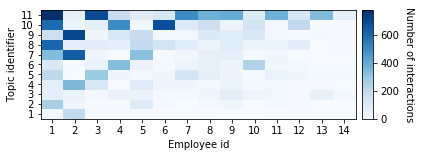

In [56]:
plt.figure(figsize=(6,2))
plt.pcolormesh(M, cmap=plt.cm.Blues)
cb= plt.colorbar(fraction=0.04, pad=0.02, aspect=10)
cb.ax.get_yaxis().labelpad = 15
cb.set_label('Number of interactions', rotation=270)
plt.yticks(np.array(range(n_p)) + 0.5, range(1, n_p + 1))
plt.xticks(np.array(range(n_a)) + 0.5, range(1, n_a + 1))
plt.xlabel('Employee id');
plt.ylabel('Topic identifier');

In [17]:
with open('model.stan', 'r') as f:
    print(f.read())

// code from jg Younf
// Mixture model

data {
  // Dimensions of the data matrix, and matrix itself.
  int<lower=1> n_p;
  int<lower=1> n_a;
  int<lower=0> M[n_p, n_a];
}
transformed data {
  // Pre-compute the marginals of M to save computation in the model loop.
  int M_rows[n_p] = rep_array(0, n_p);
  int M_cols[n_a] = rep_array(0, n_a);
  int M_tot = 0;
  for (i in 1:n_p) {
    for (j in 1:n_a) {
      M_rows[i] += M[i, j];
      M_cols[j] += M[i, j];
      M_tot += M[i, j];
    }
  }
}
parameters {
  real<lower=0> C;  // effect of the overall time or land area of observation by an overall constant C that multiplies the mean μ_ij 
  real<lower=0> r;  // represent the larger number of visits when B_ij = 1, versus when it is 0.
  simplex[n_p] sigma;  // abundances of topic i 
  simplex[n_a] tau;    // abundances of community member i
  real<lower=0, upper=1> rho;  // probability of an edge
}
model {
  // Global sums and parameters
  target += M_tot * log(C) - C;
  // Weighted margin

In [57]:
model = pp.load_model()

/home/jonathan/Documents/BIN/ssnenron/Plant_pollinator_inference/model.bin [Skipping --- already compiled]


In [74]:
samples = pp.generate_sample(M, model, warmup=3000, num_samples=1000)

ValueError: x and y must be the same size

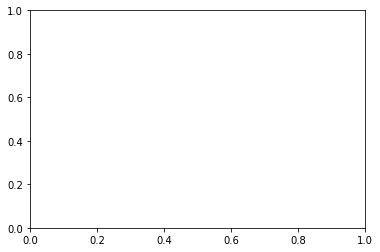

In [72]:
plt.scatter(range(2000), samples['lp__'], s=10, c='k')
for sep in [500, 1000, 1500]:
    plt.axvline(sep, c='k', ls='--', lw=1)
plt.xlabel('Sample ID')
plt.ylabel('log posterior')

In [75]:
samples


For the full summary use 'print(fit)'

Inference for Stan model: plant_pol_a47ca2d126820dc59c9708cac3cba0bc.
4 chains, each with iter=4000; warmup=3000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
C         6296.4  426.34  609.6 5343.8 5707.9 6356.8 6869.8 7092.2      2   6.57
r           5.33    0.13   0.22   4.95   5.16   5.31   5.48   5.78      3   1.69
sigma[1]    0.03  1.1e-3 2.2e-3   0.02   0.03   0.03   0.03   0.03      4   1.44
sigma[2]    0.04  3.2e-3 4.9e-3   0.03   0.04   0.04   0.05   0.05      2   2.63
sigma[3]    0.05    0.01   0.01   0.03   0.03   0.04   0.06   0.07      2   3.94
sigma[4]    0.06  1.6e-3 2.9e-3   0.05   0.05   0.06   0.06   0.06      3   1.54
sigma[5]    0.06  1.3e-3 2.5e-3   0.05   0.05   0.06   0.06   0.06      4   1.39
sigma[6]    0.09  6.5e-3 9.5e-3   0.07   0.08   0.09   0.09    0.1      2    3.9
sigma[7]    0.09  5.1e-3 7.5e-3   0.07   0.